# 8 機械学習の基礎練習と総合問題解答

- **[8.1 機械学習の全体像](#8.1-機械学習の全体像)**
    - [8.1.1 機械学習とは？](#8.1.1-機械学習とは？)
    - [8.1.2 教師あり学習](#8.1.2-教師あり学習)
    - [8.1.3 教師なし学習](#8.1.3-教師なし学習)
    - [8.1.4 強化学習](#8.1.4-強化学習)
<br><br>
- **[8.2 教師あり学習](#8.2-教師あり学習)** 
    - [8.2.1 重回帰分析](#8.2.1-重回帰分析)
    - [8.2.2 ロジスティック回帰分析](#8.2.2-ロジスティック回帰分析)
    - [8.2.3 正則化、ラッソ回帰、リッジ回帰](#8.2.3-正則化、ラッソ回帰、リッジ回帰)
    - [8.2.4 決定木](#8.2.4-決定木)
    - [8.2.5 k-NN](#8.2.5-k-NN)
    - [8.2.6 サポートベクターマシン](#8.2.6-サポートベクターマシン)
<br><br> 
- **[8.3 教師なし学習](#8.3-教師なし学習)** 
    - [8.3.1 クラスタリング(クラスター分析）](#8.3.1-クラスタリング)
    - [8.3.2 次元圧縮（主成分分析）](#8.3.2-次元圧縮)
    - [8.3.3 バスケット分析とアソシエーションルール](#8.3.3-バスケット分析とアソシエーションルール)
<br><br>
- **[8.4 総合問題](#8.4-総合問題)**
    - [8.4.1 総合問題1](#8.4.1-総合問題1)
    - [8.4.2 総合問題2](#8.4.2-総合問題2)

## 8.1 機械学習の全体像
ゴール：機械学習の各アプローチ（教師あり学習、教師なし学習）と概要を知ること

In [2]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

## 8.2 教師あり学習
ゴール：重回帰分析、ロジスティック回帰分析、決定木、サポートベクターマシン、k-NN法、正則化やリッジ回帰を理解して、実装できること

### 8.2.1 重回帰分析
キーワード：目的変数、説明変数、多重共線性、変数選択法

In [3]:
# 自動車価格データの取得
import requests, zipfile
from io import StringIO
import io

# url 
auto_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s=requests.get(auto_data_url).content
auto_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
auto_data.columns =["symboling","normalized-losses","make","fuel-type"
                     ,"aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length"
                   ,"width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system"
                    ,"bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

####  <練習問題 1>
上記のデータを使って、目的変数は同じpriceで、説明変数lengthとengine-sizeを使って、重回帰分析をしてみましょう。ただし、学習データとテストデータが半分になるように分けてモデリングして、テストデータでスコアを求めてください。なお、学習データとテストデータ分けるメソッドのrandom_stateは0に設定して実施してください。

In [6]:
# 解答
# データの準備
auto_data = auto_data[~auto_data["price"].isin(['?'])]
auto_data = auto_data[~auto_data["horsepower"].isin(['?'])]
sub_auto_data1 = auto_data[["price","length","engine-size"]]

In [7]:
# 解答
# データの分割（学習データとテストデータ分ける）
from sklearn.cross_validation import train_test_split

# モデル
from sklearn import linear_model

# モデルのインスタンス
l_model = linear_model.LinearRegression()

# 説明変数に "price" 以外を利用
X = sub_auto_data1.drop("price", axis=1)
Y = sub_auto_data1['price']

# 学習データとテストデータ分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=0)

clf = l_model.fit(X_train,y_train)

print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 
print(clf.intercept_)

train: LinearRegression 0.787024620804
test: LinearRegression 0.76078011715
   Coefficients         Name
1    127.231573  engine-size
0    161.722926       length
-31447.3810525


### 8.2.2 ロジスティック回帰分析
キーワード：ロジスティック回帰分析

####  <練習問題 1>
sklearn.datasetsのload_breast_cancerを読み込んで、目的変数をcancer.targetとして、cancer.dataを説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分けるtrain_test_split（random_state=0）を使って、テストデータにおけるスコアを求めてください。ただし、変数は標準化してください。

In [2]:
# 解答
# データの分類
from sklearn.cross_validation import train_test_split

# 分析対象データ
from sklearn.datasets import load_breast_cancer

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.958041958042


### 8.2.3 正則化、ラッソ回帰、リッジ回帰
キーワード：正則化、ラッソ回帰、リッジ回帰

### 8.2.4 決定木
キーワード：決定木、分類木、回帰木、エントロピー、情報利得、ジニ不純度、分類誤差

####  <練習問題 1>
分析対象データとして、sklearnのdatasetsからload_breast_cancerを読み込んで、目的変数をcancer.target、説明変数をcancer.dataとして、決定木のモデルを使って、予測と検証を実施してください。

In [302]:
# 解答
# データの分類
from sklearn.cross_validation import train_test_split

# 分析対象データ
from sklearn.datasets import load_breast_cancer

# 決定木
from sklearn.tree import  DecisionTreeClassifier

# data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

# 決定木インスタンス
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

tree.fit(X_train,y_train)

print("train:",tree.__class__.__name__ ,tree.score(X_train,y_train))
print("test:",tree.__class__.__name__ , tree.score(X_test,y_test))

train: DecisionTreeClassifier 0.971830985915
test: DecisionTreeClassifier 0.93006993007


### 8.2.5 k-NN
キーワード：k-NN,怠惰学習,memory-based learning,Look-Alike model

####  <練習問題 1>
1章のデータを使って、目的となる変数をG3、説明変数となる属性データを以下のようにして、K-NNのkパラメータを変えながら、どのkが最適か考えてみましょう。ただし、目的変数は数値型で、回帰となりますので、KNeighborsRegressorを使ってください。これは、設定されたkの数の平均になります。

In [5]:
student_data_math = pd.read_csv("student-mat.csv",sep=";")

In [6]:
X = student_data_math.loc[:, ['age','Medu','Fedu','traveltime','studytime'
                              ,'failures','famrel','freetime','goout','Dalc','Walc'
                              ,'absences','G1','G2']].as_matrix()

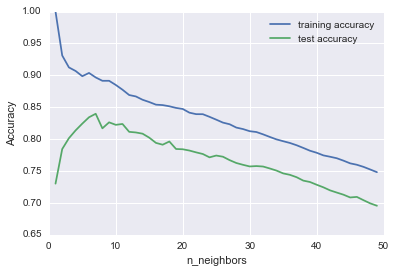

In [7]:
# 解答
# k-NN & Hold out test
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X,student_data_math.G3, random_state=0)

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,50)
for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy,label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# k=8付近であることがわかる

### 8.2.6 サポートベクターマシン
キーワード：サポートベクターマシン

####  <練習問題 1>
cancerデータについて、モジュールはsklearn.svmのSVCを使って、cancer.targetを予測するモデルを構築しましょう。パラメーターは、kernel='rbf'を使います。（model = SVC(kernel='rbf', random_state=0, C=2)としてください。）前と同じように、訓練データとテストデータに分けて、標準化してスコアをチェックしてください。

In [93]:
# SVM
from sklearn.svm import SVC

from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

model = SVC(kernel='rbf', random_state=0, C=2)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: SVC 0.988262910798
test: SVC 0.986013986014


## 8.3 教師なし学習
ゴール：教師なし学習のクラスタリング(非階層と階層)、次元圧縮、パターンマイニングの基本を理解し、簡単な実装ができる

### 8.3.1 クラスタリング
キーワード：非階層型、階層型、k-means、k-means++

### 8.3.2 次元圧縮
キーワード：PCA

### 8.3.3 バスケット分析とアソシエーションルール
キーワード：アソシエーションルール、支持度、確信度、リフト値

## 8.4 総合問題

### 8.4.1 総合問題1
分析対象データとして、sklearnのdatasetsからload_iris(アヤメの花)を読み込んで、目的変数をiris.target、説明変数をiris.dataとして、決定木のモデルを使って、予測と検証を実施してください。

In [ ]:
# データの分類
from sklearn.cross_validation import train_test_split

# 分析対象データ
from sklearn.datasets import load_iris

# 決定木
from sklearn.tree import DecisionTreeClassifier

# data
iris = load_iris()

In [304]:
# 解答
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

# 決定木インスタンス（エントロピー）
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

tree.fit(X_train,y_train)

print("train:",tree.__class__.__name__ ,tree.score(X_train,y_train))
print("test:",tree.__class__.__name__ , tree.score(X_test,y_test))

train: DecisionTreeClassifier 0.981981981982
test: DecisionTreeClassifier 0.974358974359


### 8.4.2 総合問題2

同じデータ(load_breast_cancer()など)に対して、ロジスティック回帰分析やSVMなど今まで学んだモデルを試し、どれが一番スコアが高いでしょうか？ また、データによって、一番良いスコアが出るモデルは異なりますが、その特徴はどんなものか、考察してください。（これをノーフリーランチといい、どんなデータに対しても、一番良いモデルになるモデルはないということを意味します。）

In [4]:
# 解答

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

for model in [LinearSVC(), LogisticRegression(),
              DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=6)]:
    clf = model.fit(X_train,y_train)
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearSVC 0.931924882629
test: LinearSVC 0.909090909091
train: LogisticRegression 0.962441314554
test: LogisticRegression 0.937062937063
train: DecisionTreeClassifier 1.0
test: DecisionTreeClassifier 0.923076923077
train: KNeighborsClassifier 0.950704225352
test: KNeighborsClassifier 0.916083916084


ちなみに、ノーフリーランチという言葉は、機械学習だけではなく、データベース（情報工学）や金融工学でもでてきます。